In [1]:
#GridSearchCV (SVM)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Se define la la función que muestra la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","plastico","cristal"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    #else:
        #print('Matriz de confusion')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [5]:
print(len(train),len(train[0]),len(train[0][0]))

10 270 582


In [6]:
'''
Definition of the SVM parameter search
'''
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid_svm = dict(gamma=gamma_range, C=C_range)
nested_cv = 5

grid_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, cv=nested_cv)


Particion  1
Tasa de acierto: 0.8333333333333334


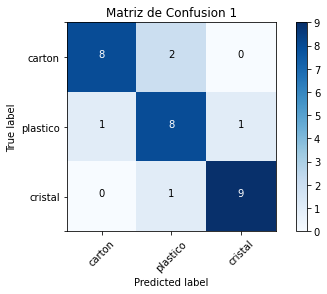

Particion  2
Tasa de acierto: 0.8


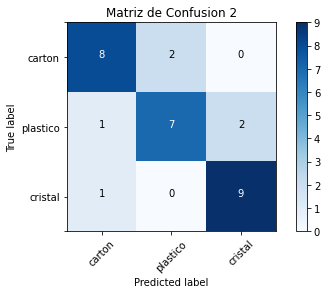

Particion  3
Tasa de acierto: 0.8333333333333334


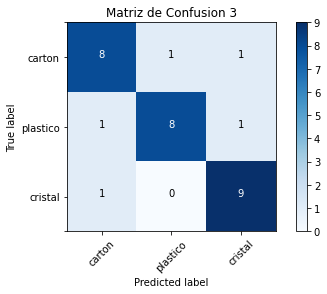

Particion  4
Tasa de acierto: 0.9


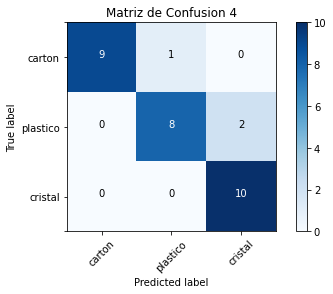

Particion  5
Tasa de acierto: 0.9


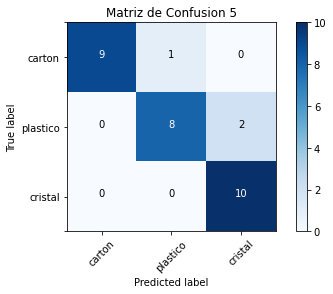

Particion  6
Tasa de acierto: 0.8666666666666667


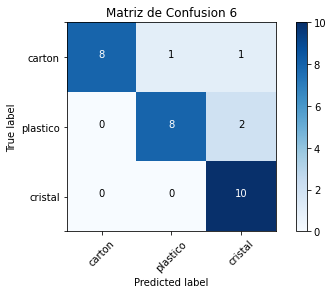

Particion  7
Tasa de acierto: 0.8666666666666667


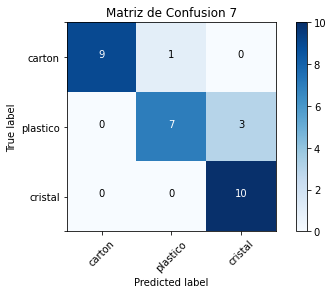

Particion  8
Tasa de acierto: 0.8333333333333334


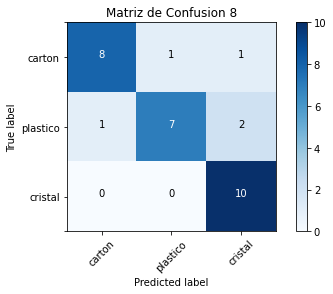

Particion  9
Tasa de acierto: 0.8


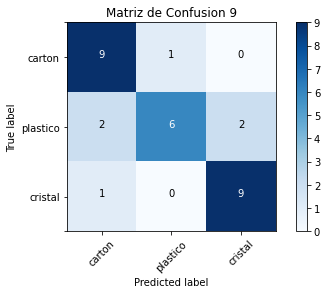

Particion  10
Tasa de acierto: 0.8333333333333334


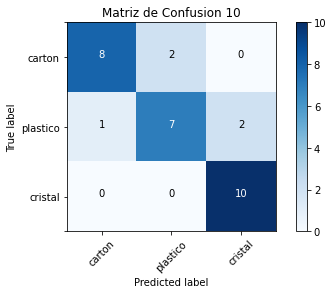

TODAS LAS PARTICIONES
Tasa de acierto promedio:  0.8467


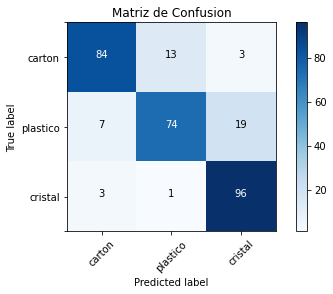

In [7]:
x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0


for i in range(len(train)):
    x_train = list()
    x_test = list()
    y_train = list()
    y_test = list()
    print("Particion ", i + 1)
    
    y_train = np.array(["carton"]*int(train[i].shape[0]/3) 
                    +  ["plastico"]*int(train[i].shape[0]/3) 
                    +  ["cristal"]*int(train[i].shape[0]/3))
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
                   +  ["plastico"]*int(test[i].shape[0]/3) 
                   +  ["cristal"]*int(test[i].shape[0]/3))

    x_train = train[i]
    x_test = test[i]
    
    grid_svm.fit(x_train,y_train)
    
    y_prds = grid_svm.predict(x_test)
    score = metrics.accuracy_score(y_test, y_prds)
    
    y_test2.extend(y_test)
    y_prds2.extend(y_prds)
    
    print('Tasa de acierto:',score)
    media += score
    
    #Confusion matrix
    #cm = confusion_matrix(y_test, y_prds)
    plt.figure() #num=None, figsize=(8, 6), dpi=80
    plot_confusion_matrix(confusion_matrix(y_test, y_prds), classes= ["carton","plastico","cristal"], 
                          title='Matriz de Confusion ' + str(i+1))
    plt.show()
    

print("TODAS LAS PARTICIONES")
print("Tasa de acierto promedio: {0: 0.4f}".format(media/len(test)))

#Confusion matrix (TODO)
#cm = confusion_matrix(y_test2, y_prds2)
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(confusion_matrix(y_test2, y_prds2), classes= ["carton","plastico","cristal"], 
                      title='Matriz de Confusion')
plt.show()    
    
    
    

# -------------------------------------------------------------------------------